In [1]:
import pandas as pd
file_path = "./ref/청소년정신건강20250304.csv"
ori = pd.read_csv(file_path)
ori

,시점,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [2]:
# 컬럼명 지정
new_name = ['시점','스트레스','스트레스남학생','스트레스여학생','우울감경험율','우울남학생', '우울여학생','자살생각율','자살남학생','자살여학생']
ori.columns= new_name
ori

,시점,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [3]:
# 시점을 없애고 , 0번 행도 없앰.
ori= ori.loc[1:,'스트레스':]
ori

,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
1,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [4]:
# 2번 인덱스 행을 생성 , 100에서 값을 뺀 값
ori.loc[2] = 100 - ori.loc[1,'스트레스':].astype(float)
# 마지막에 응답컬럼을 생성, 그렇다 or 아니다.
ori['응답'] = ['그렇다','아니다']
ori

,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생,응답
1,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4,그렇다
2,54.7,60.4,48.7,71.8,76.1,67.4,85.8,88.9,82.6,아니다


In [5]:
ori = ori.set_index('응답')
ori

,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4
아니다,54.7,60.4,48.7,71.8,76.1,67.4,85.8,88.9,82.6


In [6]:
# OS에 사용가능한 , 설치된 폰트를 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist

['C:\\Windows\\Fonts\\ERASMD.TTF',
 'C:\\Windows\\Fonts\\phagspa.ttf',
 'C:\\Windows\\Fonts\\cour.ttf',
 'C:\\Windows\\Fonts\\BSSYM7.TTF',
 'C:\\Windows\\Fonts\\GOUDYSTO.TTF',
 'C:\\Windows\\Fonts\\PERB____.TTF',
 'C:\\Windows\\Fonts\\MSUIGHUB.TTF',
 'C:\\Windows\\Fonts\\seguisym.ttf',
 'C:\\Windows\\Fonts\\calibril.ttf',
 'C:\\Windows\\Fonts\\segoeuil.ttf',
 'C:\\Windows\\Fonts\\LFAX.TTF',
 'C:\\Windows\\Fonts\\msyh.ttc',
 'C:\\Windows\\Fonts\\BKANT.TTF',
 'C:\\Windows\\Fonts\\gulim.ttc',
 'C:\\Windows\\Fonts\\segoeuii.ttf',
 'C:\\Windows\\Fonts\\GILBI___.TTF',
 'C:\\Windows\\Fonts\\consolab.ttf',
 'C:\\Windows\\Fonts\\REFSAN.TTF',
 'C:\\Windows\\Fonts\\BELLB.TTF',
 'C:\\Windows\\Fonts\\GIL_____.TTF',
 'C:\\Windows\\Fonts\\SegUIVar.ttf',
 'C:\\Windows\\Fonts\\GIGI.TTF',
 'C:\\Windows\\Fonts\\HANBatangExtB.ttf',
 'C:\\Windows\\Fonts\\ebrimabd.ttf',
 'C:\\Windows\\Fonts\\FRABK.TTF',
 'C:\\Windows\\Fonts\\javatext.ttf',
 'C:\\Windows\\Fonts\\LHANDW.TTF',
 'C:\\Windows\\Fonts\\calibri.ttf

Text(0.2, 0.4, '한글')

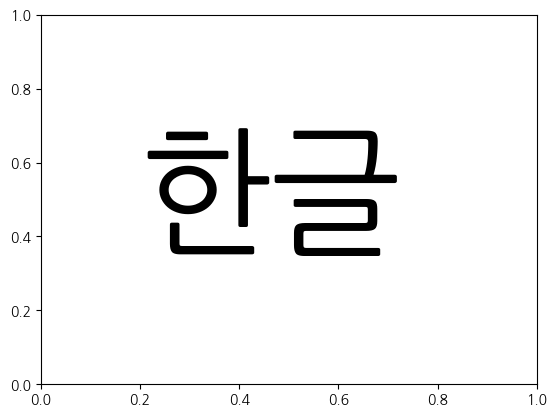

In [7]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

<Axes: ylabel='스트레스'>

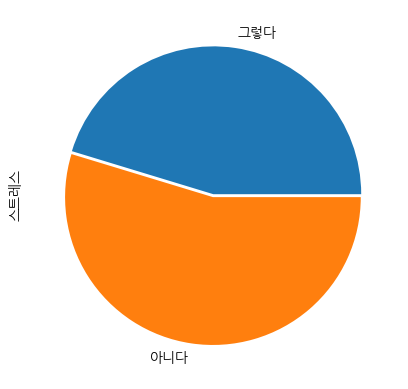

In [8]:
ori['스트레스'].astype(float).plot.pie(explode = [0, 0.02])

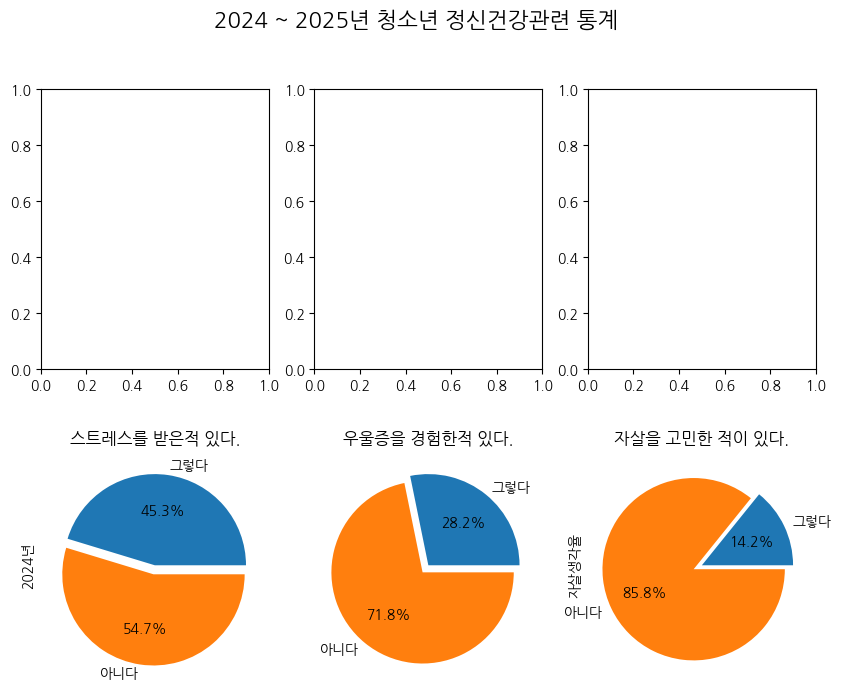

In [10]:
fig , ax = plt.subplots(2,3,figsize=(10,8)) 

ori['스트레스'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[1][0], autopct="%.1f%%")
# 계산을 위해 타입을 float로 바꿔주고, explode를 이용해 파이 그래프 조각 간격을 띄워 보기 좋게 해주고, 
# 해당 자료를 어디 그래프에 넣을지 위치 설정해주기
ax[1][0].set_title('스트레스를 받은적 있다.')
ax[1][0].set_ylabel('2024년')

ori['우울감경험율'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[1][1], autopct="%.1f%%")
ax[1][1].set_title('우울증을 경험한적 있다.')
ax[1][1].set_ylabel('')

ori['자살생각율'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[1][2], autopct="%.1f%%")
ax[1][2].set_title('자살을 고민한 적이 있다.')

plt.suptitle('2024 ~ 2025년 청소년 정신건강관련 통계',fontsize=16)
plt.show()